# Non-Inverting Operational Amplifier

## Import and Formatting

The goal of this section is to import all the necessary files and libraries required for the subsequent data analysis.  
It also includes setting up the formatting parameters for the plots and visualizations.

### Import

In [20]:
# ============================================================
# Import Required Libraries
# ============================================================

# ------------------------------------------------------------
# Numerical and Plotting Libraries
# ------------------------------------------------------------
import numpy as np
import matplotlib.pyplot as plt

# ------------------------------------------------------------
# PySpice Core Classes
# ------------------------------------------------------------
from PySpice.Spice.Netlist import Circuit, SubCircuitFactory
from PySpice.Unit import *

# ============================================================
# End of Imports
# ============================================================

### Formatting

Adjusting Plotly chart settings for clarity and consistency.

In [2]:
# ----  Formatting charts
%matplotlib inline
from IPython.core.pylabtools import figsize
import matplotlib as mpl
mpl.rcParams['lines.linewidth'] = 2.0
mpl.rcParams['axes.edgecolor']  = "#bcbcbc"
mpl.rcParams['patch.linewidth'] = 0.5
mpl.rcParams['legend.fancybox'] = True
mpl.rcParams['axes.facecolor']  = "#eeeeee"
mpl.rcParams['axes.labelsize']  = "large"
mpl.rcParams['axes.grid']       = True
mpl.rcParams['grid.linestyle']  = "--"
mpl.rcParams['patch.edgecolor'] = "#eeeeee"
mpl.rcParams['axes.titlesize']  = "x-large"

## Circuit

In the diagram [](#Aopnoinverting), you can see the circuit that will be analyzed.
It is a relatively simple configuration consisting of an **operational amplifier (op-amp)**, its **power supply connections**, and two resistors labeled **$R_1$** and **$R_2$**.

The objective is to thoroughly understand how this circuit operates, starting from its fundamental equations and then moving on to simulations to explore its limitations.

```{figure} ./images/Aopnoninverting.svg
:name: Aopnoinverting
:align: center
:width: 500px

Non-inverting amplifier
```

The main difference between this configuration and the **inverting amplifier** studied previously lies in which input terminal is used.
Here, the **non-inverting input (+)** receives the signal, whereas in the [**inverting configuration**](#./02_Inverting_amplifier), the signal is applied to the **inverting input (–)**.

This seemingly small difference has a significant impact on the resulting equations and on the circuit’s behavior, particularly regarding **phase** and **gain polarity**.


## Equation

The expression for the output voltage is straightforward.
It shows that the voltage gain depends on the resistor ratio $1 + \frac{R_2}{R_1}$.

In this configuration, the **gain is always positive** — meaning the output signal is **in phase** with the input — and its magnitude is always **greater than or equal to 1**.

```{math}
V_{out} = V_{in} \cdot \left( 1 + \frac{R_2}{R_1} \right)
```

The next section will focus on deriving this equation step by step to better understand the internal operation of the circuit.


## Demonstration of the Non-Inverting Amplifier

```{figure} ./images/Aopnoninverting_demonstration.svg
:name: Aopnoinverting_demonstration
:align: center
:width: 500px

Illustration to aid the step-by-step derivation of $V_\text{out} = f(V_\text{in})$
```

The goal is to **derive the output voltage as a function of the input voltage**:

$$
V_\text{out} = f(V_\text{in})
$$

### Step 1: Apply Kirchhoff’s Voltage Law (Loop Analysis)

Consider the loop containing the input and the resistive feedback network:

$$
V_\text{in} = V_{R_2} + V_\text{out}
$$

or equivalently:

$$
V_\text{out} = V_\text{in} - V_{R_2} = V_\text{in} - R_2 \cdot i
$$


### Step 2: Analyze the Resistor Loop

The voltage drop across $R_1$ and $R_2$ sums to the output voltage:

$$
V_{R_1} + V_{R_2} = V_\text{out}
$$

$$
R_1 \cdot i + R_2 \cdot i = V_\text{out}
$$

$$
i \cdot (R_1 + R_2) = V_\text{out} \quad \Rightarrow \quad i = \frac{V_\text{out}}{R_1 + R_2}
$$

### Step 3: Combine Equations

Substitute $i$ into the first equation:

$$
V_\text{out} = V_\text{in} - R_2 \cdot i
$$

$$
V_\text{out} = V_\text{in} - R_2 \cdot \frac{V_\text{out}}{R_1 + R_2}
$$

$$
V_\text{out} + V_\text{out} \cdot \frac{R_2}{R_1 + R_2} = V_\text{in}
$$

$$
V_\text{out} \left( 1 + \frac{R_2}{R_1 + R_2} \right) = V_\text{in}
$$

$$
V_\text{out} \cdot \frac{R_1 + R_2}{R_1 + R_2} = V_\text{in} \quad \Rightarrow \quad V_\text{out} = V_\text{in} \frac{R_1 + R_2}{R_1}
$$

### Step 4: Final Expression

$$
\boxed{V_\text{out} = V_\text{in} \left( 1 + \frac{R_2}{R_1} \right)}
$$

This clearly shows that the **gain** of a non-inverting amplifier is always **positive** and depends solely on the resistor ratio:

$$
G = 1 + \frac{R_2}{R_1}
$$

## Circuit Construction

```{figure} ./images/Aopnoninverting_pyspace.svg
:name: Aopnoninverting_pyspace
:align: center
:width: 500px
No Inverting amplifier circuit setup for SPICE simulation
````

In the [](#Aopnoninverting_pyspace), you can observe the complete circuit layout and the accessible nodes.

In [ ]:
class AOP_montage(SubCircuitFactory):
    NAME = 'AOP_no_inverting_amplifier'
    NODES = ('input', 'v-', 'out', 'VCC', 'VEE')

    def __init__(self, R1=10@u_kOhm, R2=100@u_kOhm):
        super().__init__()
        # AOP 741 
        self.X('U1', 'UA741', 'input', 'v-', 'VCC', 'VEE', 'out')
        
        # Resistance contrôle
        self.R(1, 'v-', self.gnd, R1)
        self.R(2, 'v-', 'out', R2)
        
        # Resistance de charge
        self.R('L', 'out', self.gnd, 10@u_kOhm)

## Simulation of the Non-Inverting Amplifier

### Static (DC) Simulation

In a **static simulation** (also called **operating point analysis**), we study the **steady-state behavior** of the circuit, i.e., the voltages and currents when the circuit has reached equilibrium.

For a **non-inverting amplifier**, the output voltage is determined by the resistor network and the input voltage:

$$
V_\text{out} = V_\text{in} \left( 1 + \frac{R_2}{R_1} \right)
$$

This relationship can be verified directly using the **operating point analysis**, which provides:

$$
V^+ = V^- = V_\text{in} \quad ; \quad V_\text{out} = \text{voltage at the output node}
$$

**Notes**

* The non-inverting configuration ensures that the **output is in phase with the input**.
* The gain is always **positive**, in contrast to the inverting amplifier.
* The input voltage essentially appears across the high-impedance positive input of the op-amp, so the current drawn is negligible.

In [4]:
circuit = Circuit('No inverting op-amp Amplifier')
circuit.include('lib/UA741.sub')

# Alimentation AOP
circuit.V('input', 'input', circuit.gnd, 1@u_V)
circuit.V('cc', 'VCC', circuit.gnd, 15@u_V)
circuit.V('ee', 'VEE', circuit.gnd, -15@u_V)

circuit.subcircuit(AOP_montage())
circuit.X('AMP1', 'AOP_no_inverting_amplifier', 'input', 'v-', 'out', 'VCC', 'VEE')

.title No inverting op-amp Amplifier
.include C:\Users\sacha\Desktop\Python\Electronique\electronique_book\AOP\lib\UA741.sub
.subckt AOP_no_inverting_amplifier input v- out VCC VEE
XU1 input v- VCC VEE out UA741
R1 v- 0 10kOhm
R2 v- out 100kOhm
RL out 0 10kOhm
.ends AOP_no_inverting_amplifier
Vinput input 0 1V
Vcc VCC 0 15V
Vee VEE 0 -15V
XAMP1 input v- out VCC VEE AOP_no_inverting_amplifier



## Sensibilité

In [5]:
# comming soon

## Uncertitude

In [6]:
# comming soon

## Bode Diagram

### Visualization Issues

This section focuses on the **Bode plot** of the system.  
Sometimes, plotting may encounter **visualization problems**, such as improperly scaled axes, overlapping curves, or missing frequency points.  

It is important to ensure that:

- The frequency range is properly defined.
- Both magnitude and phase plots are clearly labeled.
- The plot is rendered with adequate resolution and grid lines for readability.

```{note} 
When using libraries like `matplotlib` or `control`, always check that logarithmic axes (`semilogx`) and frequency units are correctly set to avoid common display issues.
```

In [7]:
# Initialisation variable
amplitude = 1.7

circuit = Circuit('Inverting op-amp Amplifier')
circuit.include('lib/UA741.sub')

# Alimentation AOP
circuit.SinusoidalVoltageSource('input', 'input', circuit.gnd, amplitude=amplitude@u_V, frequency=100@u_MHz)
circuit.V('cc', 'VCC', circuit.gnd, 15@u_V)
circuit.V('ee', 'VEE', circuit.gnd, -15@u_V)

circuit.subcircuit(AOP_montage())
circuit.X('AMP1', 'AOP_no_inverting_amplifier', 'input', 'v-', 'out', 'VCC', 'VEE')

.title Inverting op-amp Amplifier
.include C:\Users\sacha\Desktop\Python\Electronique\electronique_book\AOP\lib\UA741.sub
.subckt AOP_no_inverting_amplifier input v- out VCC VEE
XU1 input v- VCC VEE out UA741
R1 v- 0 10kOhm
R2 v- out 100kOhm
RL out 0 10kOhm
.ends AOP_no_inverting_amplifier
Vinput input 0 DC 0V AC 1V SIN(0V 1.7V 100MegHz 0s 0Hz)
Vcc VCC 0 15V
Vee VEE 0 -15V
XAMP1 input v- out VCC VEE AOP_no_inverting_amplifier



In [8]:
# Simulation AC
simulator = circuit.simulator(temperature=25, nominal_temperature=25)
analysis = simulator.ac(start_frequency=10@u_Hz, stop_frequency=100@u_MHz, number_of_points=1000, variation='dec')

In [9]:
freq   = np.array(analysis.frequency)
gain2  = np.abs(np.array(analysis['out'])) / np.abs(np.array(analysis['input']))
phase2 = np.angle(np.array(analysis['out']), True) - np.angle(np.array(analysis['input']), True)

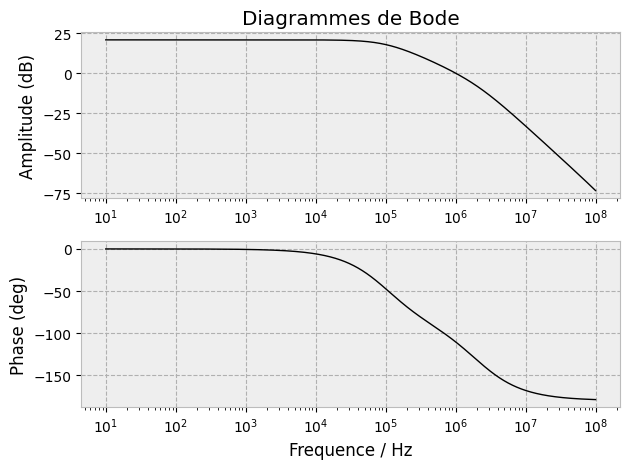

In [10]:
plt.subplot(211)
plt.title('Diagrammes de Bode')
plt.semilogx(freq, 20*np.log10(gain2), lw=1, c="black")    # Amplitude
plt.ylabel('Amplitude (dB)')


plt.subplot(212)
plt.semilogx(freq, phase2, c="black", lw=1)  # Phase
plt.xlabel('Frequence / Hz')
plt.ylabel('Phase (deg)')


plt.tight_layout()  # Ajuster le placement des courbes
plt.show()

### Bode Diagram Analysis

The **Bode diagram** provides valuable insight into two key aspects of the amplifier’s behavior:

1. **Phase shift**, and
2. **Amplitude (gain) response** across frequency.

At **low frequencies**, the phase is approximately **0°**, meaning there is **no phase shift** between the input and output signals — the system behaves as expected.
However, as the **input frequency increases**, the op-amp’s internal limitations introduce a **phase lag**, which gradually approaches **180°**, indicating an **inversion of phase** at high frequencies.

Regarding the **amplitude response**, the **bandwidth** of the system extends roughly from **10 Hz to 10 kHz**.
Beyond this range, the amplitude begins to **decrease sharply**, showing that the amplifier can no longer follow rapid variations in the input signal.

In summary, the Bode plot clearly illustrates the **frequency-dependent behavior** of the amplifier — both in its **magnitude attenuation** and **phase lag** — which are intrinsic to the physical limitations of real operational amplifiers.

## Characteristics

The objective of this section is to **characterize the amplifier**.
We aim to determine three key aspects:

1. The **matrix relationship** between input and output voltages and currents.
2. The **frequency response** (or bandwidth) of the amplifier.
3. The **linearity** of the output signal.

## Matrix Relationship

The first step is to establish a **matrix relation** linking the **input and output electrical quantities** — namely, the voltages and currents.

For a **voltage amplifier**, these quantities are described by **four fundamental parameters**:

* **$Z_e$** – input impedance
* **$Z_s$** – output impedance
* **$G$** – transconductance (gain relating input current to output voltage)
* **$G_{12}$** – reverse transfer parameter (feedback or reverse gain)

The general matrix relationship can be written as:

$$
\begin{pmatrix}
V_1\\[4pt]
V_2
\end{pmatrix} =
\begin{pmatrix}
Z_e & G_{12}\\[4pt]
G & Z_s
\end{pmatrix}
\begin{pmatrix}
I_1\\[4pt]
I_2
\end{pmatrix}
$$


```{figure} ./images/Amplifier_quadripole.svg
:name: Quadripole_simple
:align: center
:width: 500px

Simplified quadripole model of an amplifier
```

This **two-port (quadripole) representation** is widely used to describe amplifiers in a **linear, small-signal regime**.
It provides a compact and analytical way to relate the **input and output characteristics**, which are later used to analyze **gain**, **impedance matching**, and **feedback effects**.

In [11]:
amplitude = 1.7

circuit = Circuit('Inverting op-amp Amplifier')
circuit.include('lib/UA741.sub')

# Source d'entrée sinusoïdale
circuit.SinusoidalVoltageSource('input', 'input', circuit.gnd, amplitude=amplitude@u_V, frequency=100@u_MHz)

# Alimentation de l'AOP
circuit.V('cc', 'VCC', circuit.gnd, 15@u_V)
circuit.V('ee', 'VEE', circuit.gnd, -15@u_V)

# Sous-circuit défini ailleurs
circuit.subcircuit(AOP_montage())
circuit.X('AMP1', 'AOP_no_inverting_amplifier', 'input', 'v-', 'out', 'VCC', 'VEE')

.title Inverting op-amp Amplifier
.include C:\Users\sacha\Desktop\Python\Electronique\electronique_book\AOP\lib\UA741.sub
.subckt AOP_no_inverting_amplifier input v- out VCC VEE
XU1 input v- VCC VEE out UA741
R1 v- 0 10kOhm
R2 v- out 100kOhm
RL out 0 10kOhm
.ends AOP_no_inverting_amplifier
Vinput input 0 DC 0V AC 1V SIN(0V 1.7V 100MegHz 0s 0Hz)
Vcc VCC 0 15V
Vee VEE 0 -15V
XAMP1 input v- out VCC VEE AOP_no_inverting_amplifier



In [12]:
# comming soon

## Bandwidth

The goal is to determine the **bandwidth** of the amplifier, defined as the frequency range over which the signal drops by **3 dB** from its maximum value.

```{figure} ./images/Amplifier_bandwidth.svg
:name: amplifier_bandwidth
:align: center
:width: 500px

Amplifier frequency response (bandwidth)
```

In [13]:
# Initialisation variable
amplitude = 1.7

circuit = Circuit('Inverting op-amp Amplifier')
circuit.include('lib/UA741.sub')

# Alimentation AOP
circuit.SinusoidalVoltageSource('input', 'input', circuit.gnd, amplitude=amplitude@u_V, frequency=1@u_Hz)
circuit.V('cc', 'VCC', circuit.gnd, 15@u_V)
circuit.V('ee', 'VEE', circuit.gnd, -15@u_V)

circuit.subcircuit(AOP_montage())
circuit.X('AMP1', 'AOP_no_inverting_amplifier', 'input', 'v-', 'out', 'VCC', 'VEE')

.title Inverting op-amp Amplifier
.include C:\Users\sacha\Desktop\Python\Electronique\electronique_book\AOP\lib\UA741.sub
.subckt AOP_no_inverting_amplifier input v- out VCC VEE
XU1 input v- VCC VEE out UA741
R1 v- 0 10kOhm
R2 v- out 100kOhm
RL out 0 10kOhm
.ends AOP_no_inverting_amplifier
Vinput input 0 DC 0V AC 1V SIN(0V 1.7V 1Hz 0s 0Hz)
Vcc VCC 0 15V
Vee VEE 0 -15V
XAMP1 input v- out VCC VEE AOP_no_inverting_amplifier



In [14]:
# Simulation AC
simulator = circuit.simulator(temperature=25, nominal_temperature=25)
analysis = simulator.ac(start_frequency=10@u_Hz, stop_frequency=100@u_MHz, number_of_points=1000, variation='dec')

In [15]:
freq   = np.array(analysis.frequency)
gain2  = np.abs(np.array(analysis['out'])) / np.abs(np.array(analysis['input']))
phase2 = np.angle(np.array(analysis['out']), True) - np.angle(np.array(analysis['input']), True)
bande_passante = max(20*np.log10(np.abs(analysis['out']))) - 3

Should be unit less


Should be unit less


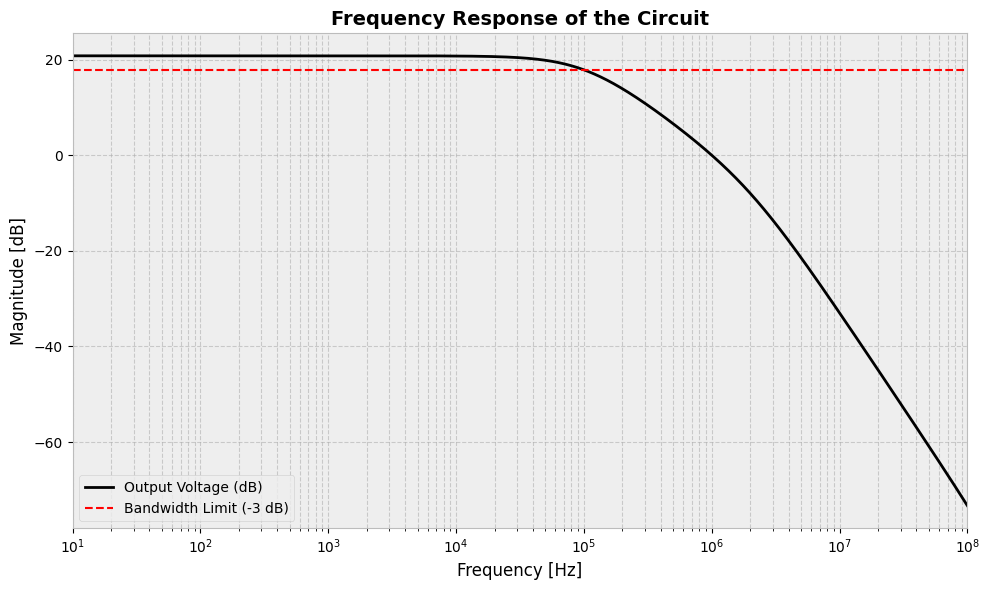

In [16]:
# ---------------------------------------------------------
# Frequency Response (Bode Plot)
# ---------------------------------------------------------

plt.figure(figsize=(10, 6))

# Plot magnitude response in dB
plt.semilogx(freq, 20 * np.log10(np.abs(analysis['out'])), color='black', linewidth=2, label='Output Voltage (dB)')

# Reference line for the -3 dB cutoff (bandwidth)
plt.axhline(y=bande_passante, color='red', linestyle='--', linewidth=1.5, label='Bandwidth Limit (-3 dB)')

# Axis formatting
plt.xlim(10, 1e8)
#plt.ylim(-60, 10)
plt.grid(True, which='both', linestyle='--', alpha=0.6)

# Titles and labels
plt.title('Frequency Response of the Circuit', fontsize=14, weight='bold')
plt.xlabel('Frequency [Hz]', fontsize=12)
plt.ylabel('Magnitude [dB]', fontsize=12)

# Legend
plt.legend(loc='best', fontsize=10, frameon=True)

# Layout optimization
plt.tight_layout()
plt.show()

```{danger}
Note: In Python, `np.log()` calculates the **natural logarithm (ln)**, not log base 10.  
- For **log base 10**, use `np.log10()`.  
- For **log base 2**, use `np.log2()`.
```

## System Linearity

Next, we analyze the **linearity** of the amplifier. This directly relates to the **Saturation Simulation** chapter.

For an ideal amplifier, the input–output relationship should look like this:

```{figure} ./images/Linearity_and_saturation.svg
:name: amplifier_linearity
:align: center
:width: 500px

Amplifier linearity and saturation
```

In [24]:
circuit = Circuit('Inverting op-amp Amplifier')
circuit.include('lib/UA741.sub')

# Alimentation AOP
circuit.V('in', 'input', circuit.gnd, 1@u_V)
circuit.V('cc', 'VCC', circuit.gnd, 15@u_V)
circuit.V('ee', 'VEE', circuit.gnd, -15@u_V)

circuit.subcircuit(AOP_montage())
circuit.X('AMP1', 'AOP_no_inverting_amplifier', 'input', 'v-', 'out', 'VCC', 'VEE')

SubCircuitElement XAMP1

In [18]:
simulator = circuit.simulator(temperature=25, nominal_temperature=25)
analysis = simulator.dc(Vin=slice(-5, 5, 0.02))

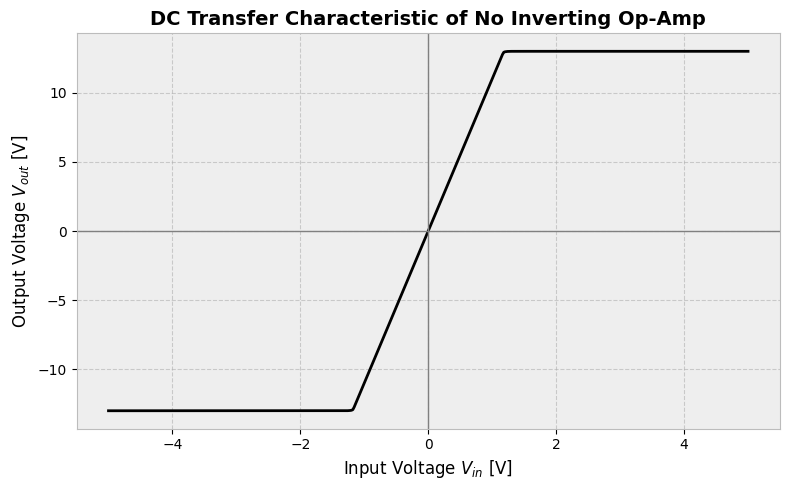

In [19]:
# Extract data
Vin_values = np.array(analysis.sweep)       # Input voltage sweep
Vout_values = np.array(analysis.out)        # Output voltage

# Plot
plt.figure(figsize=(8, 5))
plt.plot(Vin_values, Vout_values, color='black', linewidth=2)

# Graph formatting
plt.title('DC Transfer Characteristic of No Inverting Op-Amp', fontsize=14, weight='bold')
plt.xlabel('Input Voltage $V_{in}$ [V]', fontsize=12)
plt.ylabel('Output Voltage $V_{out}$ [V]', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.axhline(0, color='gray', linewidth=1)
plt.axvline(0, color='gray', linewidth=1)
plt.tight_layout()
plt.show()

**Saturation Behavior Analysis**

It can be observed that beyond ±15 V, the system enters saturation, as the output voltage ($V_{out}$) no longer varies with the input voltage ($V_{in}$).
In this region, the operational amplifier reaches its maximum output limits, determined by its power supply rails.

Additionally, the slope of the linear region corresponds to the gain of the amplifier.
Another noteworthy aspect is the sharp transition from the linear region to the nonlinear (saturated) region — this change occurs abruptly rather than gradually.
Such a sudden transition can be surprising and may warrant further investigation, as it reflects the amplifier’s internal limitations and nonlinear behavior near its output voltage boundaries.

## Distortion

In this study, **signal distortion** has not been analyzed in detail.
Future work could include measuring **harmonic distortion (THD)** or other non-linear effects to better characterize the amplifier.